# Zombie Apocalypse

In this example we will solve a more complicated system of first order ODEs.

The following model is used to model a zombie invasion :

\begin{align}
\frac{dS}{dt} &= \Pi S - \beta S Z - \delta S \\
\frac{dZ}{dt} &= \beta S Z + \zeta R - \alpha S Z \\
\frac{dR}{dt} &= \delta S + \alpha S Z - \zeta R
\end{align}

where $S$ is the number of susceptible humans, $Z$ is the number of zombies, and $R$ is the number of removed (dead) humans (incorporating both natural death and the zombie death rate). $\Pi$ describes the recruitment of new humans into the susceptible class (birth rate), $\beta$ is the transmission rate parameter controlling the rate at which zombies bite humans (an infected zombie will on average infect $\beta$ humans per day), $\alpha$ is the parameter describing the effectiveness of quarantine in removing zombies, $\zeta$ is the rate at which removed humans return to the susceptible class (alive again), and $\delta$ is the natural death rate of the susceptible population.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

### Estimation of Parameters

#### Birth rate $\Pi$

The birth rate is the number of births per 1000 people per year. The birth rate is estimated to be 18.1 births per 1000 people per year (based on CDC 2021 data). This is equivalent to 0.0000495 births per day per person.

#### Natural death percent $\delta$

The natural death percent is the percent of the population that dies per year. The natural death percent is estimated to be 7.7 deaths per year per 1000 people (based on CDC 2021 data). This is equivalent to 0.0000211 deaths per day per person.

#### Transmission percent $\beta$

The transmission percent is the percent chance that a susceptible person will become a zombie (by being bitten). The transmission percent is estimated to be 0.95% per day. This is equivalent to 0.0095 transmissions per day per person.

#### Zombie removal percent $\alpha$

The zombie removal percent is the percent chance that a zombie will be killed, finally. The zombie removal percent is estimated to be 3.0% per day. This is equivalent to 0.03 zombies removed finally per existing zombie.

#### Resurrection percent $\zeta$

The resurrection percent is the percent chance that a removed human will come back to life as a zombie. The resurrection percent is estimated to be 33.0% per day. This is equivalent to 0.33 resurrections per day per person.

#### Initial population $S_0$

The initial population is the number of people at the beginning of the outbreak. The initial population is set to be 1000 people.

In [2]:
# Define parameters
Pi = 0.0000495      # natural birth rate (per day)
delta = 0.0000211  # natural death rate (per day)
beta = 0.0095  # transmission rate  (per day)
alpha = 0.03  # zombie final removal rate  (per day)
zeta = 0.33  #  resurrection percent (per day)

S0 = 1000 #initial population
Z0, R0 = 0, 0
X0 = S0, Z0, R0
tmax = 100
Nt = 1600
t = np.linspace(0, tmax, Nt+1) #time grid


In [3]:
# Define the system of ODEs
def derivative(X, t, Pi, delta, beta, zeta, alpha):
    S, Z, R = X
    dotS = Pi - beta * S * Z - delta * S
    dotZ = beta * S * Z + zeta * R - alpha * Z * S
    dotR = delta * S + alpha * Z * S - zeta * R
    return np.array([dotS, dotZ, dotR])

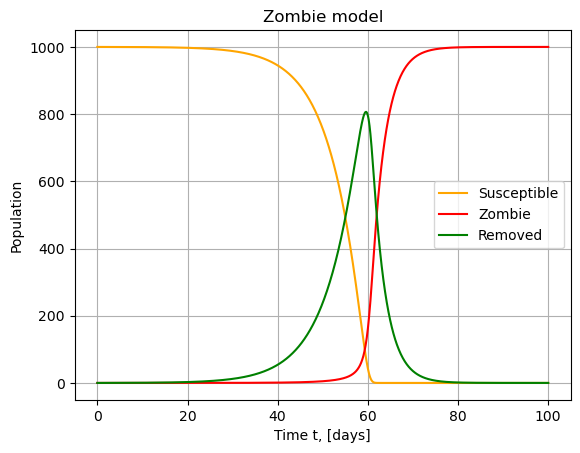

In [4]:
# Solve the system of ODEs
X = integrate.odeint(derivative, X0, t, args = (Pi, delta, beta, zeta, alpha))
S, Z, R = X.T #X.T order 3 x (Nt+1)

plt.figure()
plt.grid()
plt.title("Zombie model")
plt.plot(t, S, 'orange', label='Susceptible')
plt.plot(t, Z, 'r', label='Zombie')
plt.plot(t, R, 'g', label='Removed')
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show();

In [5]:
print(X0)

(1000, 0, 0)


In [6]:
def Euler(func, X0, t, Pi, delta, beta, zeta, alpha):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        X[i+1] = X[i] + func(X[i], t[i], Pi, delta, beta, zeta, alpha) * dt
    return X

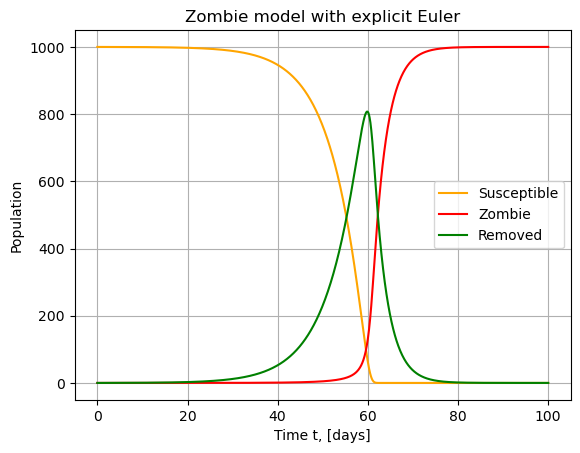

In [7]:
Xe = Euler(derivative, X0, t, Pi, delta, beta, zeta, alpha)

plt.figure()
plt.grid()
plt.title("Zombie model with explicit Euler")
plt.plot(t, Xe[:,0], 'orange', label='Susceptible')
plt.plot(t, Xe[:,1], 'r', label='Zombie')
plt.plot(t, Xe[:,2], 'g', label='Removed')
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show();

In [8]:
def RK4(func, X0, t, Pi, delta, beta, zeta, alpha):
    """
    RK4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        k1 = func(X[i], t[i], Pi, delta, beta, zeta, alpha)
        k2 = func(X[i] + k1 * dt / 2, t[i] + dt / 2, Pi, delta, beta, zeta, alpha)
        k3 = func(X[i] + k2 * dt / 2, t[i] + dt / 2, Pi, delta, beta, zeta, alpha)
        k4 = func(X[i] + k3 * dt, t[i] + dt, Pi, delta, beta, zeta, alpha)
        X[i+1] = X[i] + (k1 + 2 * k2 + 2 * k3 + k4) * dt / 6
    return X

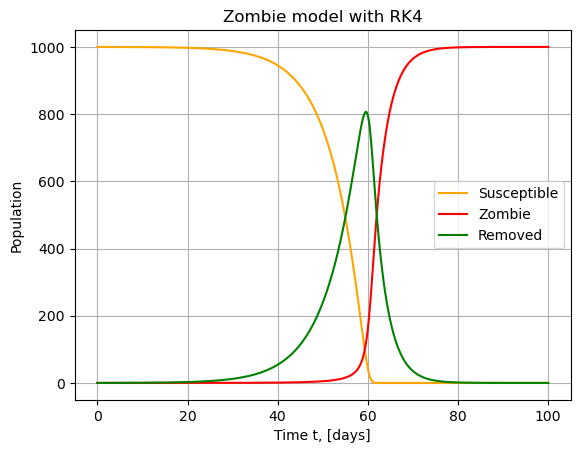

In [9]:
Xrk = RK4(derivative, X0, t, Pi, delta, beta, zeta, alpha)

plt.figure()
plt.grid()
plt.title("Zombie model with RK4")
plt.plot(t, Xrk[:,0], 'orange', label='Susceptible')
plt.plot(t, Xrk[:,1], 'r', label='Zombie')
plt.plot(t, Xrk[:,2], 'g', label='Removed')
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

In [10]:
# Define parameters
Pi = 0.0000495      # natural birth rate (per day)
delta = 0.0000211  # natural death rate (per day)
beta = 0.0095  # transmission rate  (per day)
alpha = 0.03  # zombie final removal rate  (per day)
zeta = 0.00  #  resurrection percent (per day)

S0 = 900 #initial population
Z0, R0 = 100, 0
X0 = S0, Z0, R0
tmax = 10000
Nt = 1600
t = np.linspace(0, tmax, Nt+1) #time grid

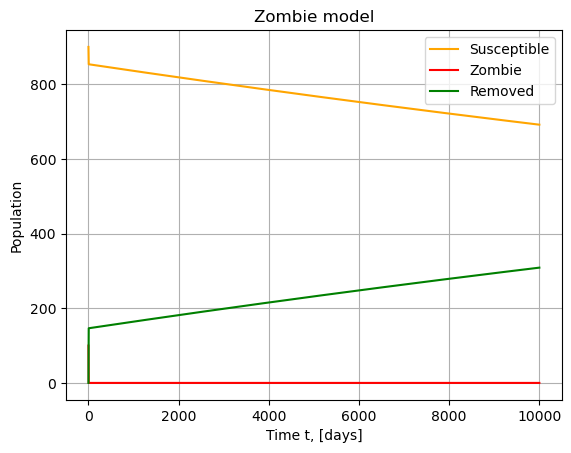

In [11]:
X = integrate.odeint(derivative, X0, t, args = (Pi, delta, beta, zeta, alpha))
S, Z, R = X.T #X.T order 3 x (Nt+1)

plt.figure()
plt.grid()
plt.title("Zombie model")
plt.plot(t, S, 'orange', label='Susceptible')
plt.plot(t, Z, 'r', label='Zombie')
plt.plot(t, R, 'g', label='Removed')
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show();

In [12]:
import ipywidgets as ipw


In [13]:
%matplotlib notebook


<IPython.core.display.Javascript object>


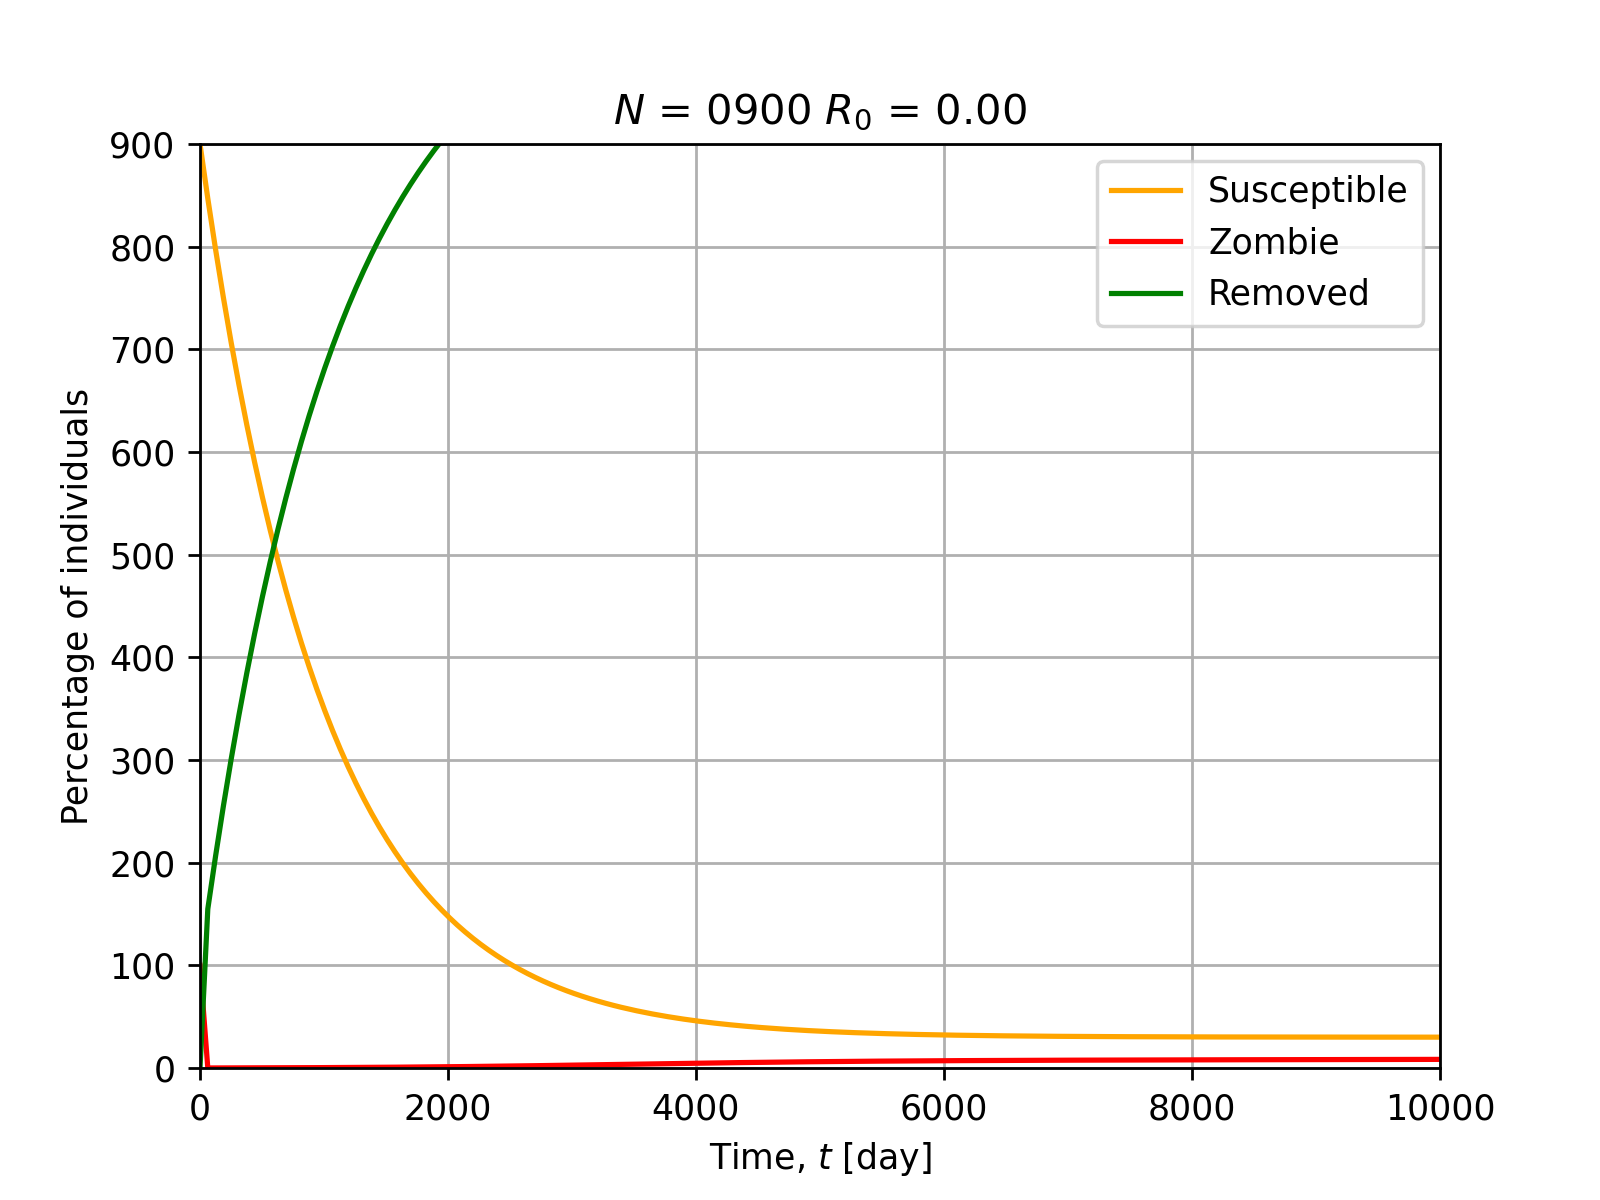

interactive(children=(FloatSlider(value=0.015, description='Pi', max=0.03, step=0.001), FloatSlider(value=0.01…

<function __main__.update(Pi, delta, beta, zeta, alpha)>

In [14]:
def update(Pi, delta, beta, zeta, alpha):
    """
    Update function
    """
    #I0, R0, M0 = 1000, 0, 0
    #S0 = N - I0 - R0 - M0
    #X0 = S0, I0, R0, M0

    sol = integrate.odeint(derivative, X0, t, args = (Pi, delta, beta, zeta, alpha))
    line0.set_ydata(sol[:, 0])
    line1.set_ydata(sol[:, 1])
    line2.set_ydata(sol[:, 2])
  

    txR0 = beta/zeta
    ax.set_title("$N$ = {0} $R_0$ = {1:.2f}".format(str(S0).zfill(4), txR0))
    fig.canvas.draw()
    fig.canvas.flush_events()

Nt = 160
t = np.linspace(0., tmax, Nt)
X = np.zeros((Nt,4))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()
line0, = ax.plot(t, X[:,0], "orange", label = "Susceptible")
line1, = ax.plot(t, X[:,1], "r", label = 'Zombie')
line2, = ax.plot(t, X[:,2], "g", label = 'Removed')

ax.set_xlim(0., tmax)
ax.set_ylim(0., S0)
ax.set_xlabel("Time, $t$ [day]")
ax.set_ylabel("Percentage of individuals")
plt.legend()

ipw.interact(update, Pi = (0.,30/1000, 0.001), delta = (0.0, 30/1000, 0.001), beta = (0.0, 200/10000, 0.001), 
             zeta = (0.01,1., 0.01), alpha = (0.,1., 0.01))
    

Having a high birth rate, a low infection rate, and a low resurrection rate is best to defeat the zombies.